<a href="https://colab.research.google.com/github/mmcpike/cms/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# To do
Add permutation in addition to MDI \\
Analysis without important comorbities (e.g. psychotic, age)\\
how pct_black, pct_hispanic correlated with psychotic, etc. \\
EDA
Linear Regression - leave one out?
VFI
Clean up \\
Github \\

# Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
# sb.set_style(style='white', rc=None)
import matplotlib.pyplot as plt
# # plt.style.use('classic')
# %matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance

In [ ]:
url = 'https://raw.githubusercontent.com/mmcpike/cms/main/data_clean.csv?token=GHSAT0AAAAAACED5Y5X4LSRNM5SZKEQCZNEZGSMQWQ'
data = pd.read_csv(url,index_col=0)

<ipython-input-5-0ef603f63fe5>:2: DtypeWarning: Columns (7,11,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url,index_col=0)


In [ ]:
data = data.replace('NaN', np.nan)
data.drop_duplicates(subset=None,inplace=True)

In [ ]:
data.drop(columns=['readmission_rate'],inplace=True)

In [ ]:
data['readmission_rate']=100*data['number_of_readmissions']/data['number_of_discharges']

In [ ]:
data['pct_male']=100*data['number_male_beneficiaries']/data['total_medicare_beneficiaries']
data['pct_under_65']=100*data['number_beneficiaries_under_65']/data['total_medicare_beneficiaries']
data['pct_65_to_74']=100*data['number_beneficiaries_65_to_74']/data['total_medicare_beneficiaries']
data['pct_75_to_84']=100*data['number_beneficiaries_75_to_84']/data['total_medicare_beneficiaries']
data['pct_85_over']=100*data['number_beneficiaries_85_over']/data['total_medicare_beneficiaries']
data['pct_female']=100*data['number_female_beneficiaries']/data['total_medicare_beneficiaries']
data['pct_male']=100*data['number_male_beneficiaries']/data['total_medicare_beneficiaries']
data['pct_white']=100*data['number_white_beneficiaries']/data['total_medicare_beneficiaries']
data['pct_nonwhite']=100-data['pct_white']
data['pct_black']=100*data['number_black_beneficiaries']/data['total_medicare_beneficiaries']
data['pct_asian_pi']=100*data['number_asian_pi_beneficiaries']/data['total_medicare_beneficiaries']
data['pct_hispanic']=100*data['number_hispanic_beneficiaries']/data['total_medicare_beneficiaries']
data['pct_american_indian']=100*data['number_american_indian_beneficiaries']/data['total_medicare_beneficiaries']
data['pct_other_race']=100*data['number_other_race_beneficiaries']/data['total_medicare_beneficiaries']
data['pct_medicare_medicaid']=100*data['number_beneficiaries_medicare_medicaid']/data['total_medicare_beneficiaries']
data['pct_medicare_only']=100*data['number_beneficiaries_medicare_only']/data['total_medicare_beneficiaries']

In [ ]:
data_hf = data[data['condition']=='HF']
data_copd = data[data['condition']=='COPD']
data_pn = data[data['condition']=='PN']

In [ ]:
# Lining up the conditions that CMS controls for (HRRP methodology) with patient_mix dataset:
cms_cols = [
    "beneficiary_avg_age",
    "pct_male",
    "pct_beneficiaries_cancer",
    "pct_beneficiaries_diabetes",
    "pct_beneficiaries_psychotic_disorders",
    "pct_beneficiaries_depression",
    "pct_beneficiaries_alzheimers",
    "pct_beneficiaries_congestive_heart_failure",
    "pct_beneficiaries_stroke",
    "pct_beneficiaries_copd",
    "pct_beneficiaries_chronic_kidney_disease",
    "pct_medicare_medicaid"
]
race_cols = [
    "pct_nonwhite"
]
svi_sum_cols = [
    "socioeconomic_status_sum",
    "hh_characteristics_sum",
    "minority_status_sum",
    "housing_status_sum",
]
risk_cols = [
    "beneficiary_avg_age", # ignoring other age vars for now
    "pct_male",
    "pct_white",
    "pct_black",
    "pct_asian_pi",
    "pct_american_indian",
    "pct_other_race",
    "pct_medicare_medicaid",
    'pct_beneficiaries_afib',
    'pct_beneficiaries_alzheimers',
    'pct_beneficiaries_cancer',
    'pct_beneficiaries_congestive_heart_failure',
    'pct_beneficiaries_chronic_kidney_disease',
    'pct_beneficiaries_copd',
    'pct_beneficiaries_depression',
    'pct_beneficiaries_diabetes',
    'pct_beneficiaries_hyperlipidemia',
    'pct_beneficiaries_hypertension',
    'pct_beneficiaries_ischemic_heart_disease',
    'pct_beneficiaries_osteoporosis',
    'pct_beneficiaries_arthritis',
    'pct_beneficiaries_psychotic_disorders',
    'pct_beneficiaries_stroke'
]

In [ ]:
svi_cols = [
    'housing_units',
    'households',
    'daytime_population',
    'below_150_poverty',
    'below_150_poverty_pct',
    'below_150_poverty_percentile',
    'below_150_poverty_is_90_percentile',
    'adults_unemployed',
    'unemployment_rate',
    'unemployment_percentile',
    'unemployment_is_90_percentile',
    'housing_cost_burdened',
    'housing_cost_burdened_pct',
    'housing_cost_burdened_percentile',
    'housing_cost_burdened_is_90_percentile',
    'no_hs_diploma',
    'no_hs_diploma_pct',
    'no_hs_diploma_percentile',
    'no_hs_diploma_is_90_percentile',
    'uninsured',
    'uninsured_pct',
    'uninsured_percentile',
    'uninsured_is_90_percentile',
    'socioeconomic_status_sum',
    'socioeconomic_status_percentile_rank',
    'socioeconomic_status_90_percentile_count',
    'aged_65_over',
    'aged_65_over_pct',
    'aged_65_over_percentile',
    'aged_65_over_is_90_percentile',
    'aged_17_under',
    'aged_17_under_pct',
    'aged_17_under_percentile',
    'aged_17_under_is_90_percentile',
    'disabled',
    'disabled_pct',
    'disabled_percentile',
    'disabled_is_90_percentile',
    'single_parent_hh',
    'single_parent_hh_pct',
    'single_parent_hh_percentile',
    'single_parent_hh_is_90_percentile',
    'limited_english',
    'limited_english_pct',
    'limited_english_percentile',
    'limited_english_is_90_percentile',
    'hh_characteristics_sum',
    'hh_characteristics_percentile_rank',
    'hh_characteristics_90_percentile_count',
    'minorities',
    'minorities_pct',
    'minorities_percentile',
    'minorities_is_90_percentile',
    'minority_status_sum',
    'minority_status_percentile_rank',
    'minority_status_90_percentile_count',
    'african_american',
    'african_american_pct',
    'hispanic',
    'hispanic_pct',
    'asian',
    'asian_pct',
    'american_indian',
    'american_indian_pct',
    'native_hawaiian',
    'native_hawaiian_pct',
    'two_or_more_races',
    'two_or_more_races_pct',
    'other_race',
    'other_race_pct',
    'apartments',
    'apartments_pct',
    'apartments_percentile',
    'apartments_is_90_percentile',
    'mobile_homes',
    'mobile_homes_pct',
    'mobile_homes_percentile',
    'mobile_homes_is_90_percentile',
    'crowded_housing',
    'crowded_housing_pct',
    'crowded_housing_percentile',
    'crowded_housing_is_90_percentile',
    'no_vehicle',
    'no_vehicle_pct',
    'no_vehicle_percentile',
    'no_vehicle_is_90_percentile',
    'group_quarters',
    'group_quarters_pct',
    'group_quarters_percentile',
    'group_quarters_is_90_percentile',
    'housing_status_sum',
    'housing_status_percentile_rank',
    'housing_status_90_percentile_count',
    'hh_without_internet',
    'hh_without_internet_pct',
    'series_themes_sum',
    'overall_percentile_ranking',
    'theme_90_percentile_count',
]

# EDA

High vs. Low % non-white

In [ ]:
df = data

dflow = df[df['pct_nonwhite']<df['pct_nonwhite'].quantile(q=.1)]
dfhigh = df[df['pct_nonwhite']>df['pct_nonwhite'].quantile(q=.9)]

In [ ]:
hist_max=df['readmission_rate'].max()

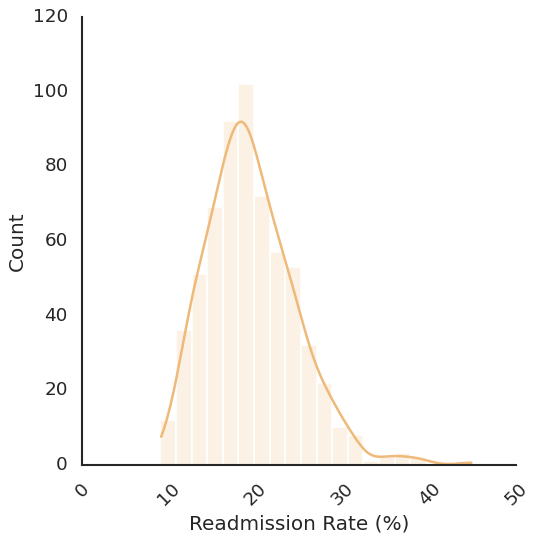

In [ ]:
sb.set_context("talk")
sb.set_style(style='white', rc=None)
fig, axs = plt.subplots(1, 1, figsize=(7, 7))
sb.despine()
sb.histplot(data=dflow, x='readmission_rate', kde=True, color="#EFB979", alpha=.2,binwidth=1.8,binrange=(0,hist_max))
# sb.histplot(data=dfhigh, x='readmission_rate', kde=True, color="#F35922", alpha=.2, binwidth=1.8,binrange=(0,hist_max))
plt.xticks(rotation = 45)
# plt.gca().set(title='Readmission Rate Histogram')
plt.xlabel('Readmission Rate (%)')
# plt.legend(labels=["Low % Non-White","High % Non-White"], frameon = False)
plt.savefig("hist_plot", dpi=300, bbox_inches="tight")

Explore distributions of variables (need to create a df first)

In [ ]:
def hist_numerical(df, var):
  fig, axs = plt.subplots(1, 1, figsize=(7, 7))

  sb.histplot(data=df, x=var, kde=True, color="skyblue")
  plt.xticks(rotation = 45)
  plt.show()

Correlations (need to create a df)

In [ ]:
# df = data_hf[cms_cols + race_cols].dropna()
df = data[cms_cols + race_cols].dropna()

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0.5, 1, 'pct_nonwhite'),
  Text(1.5, 1, 'pct_beneficiaries_diabetes'),
  Text(2.5, 1, 'pct_medicare_medicaid'),
  Text(3.5, 1, 'pct_beneficiaries_psychotic_disorders')])

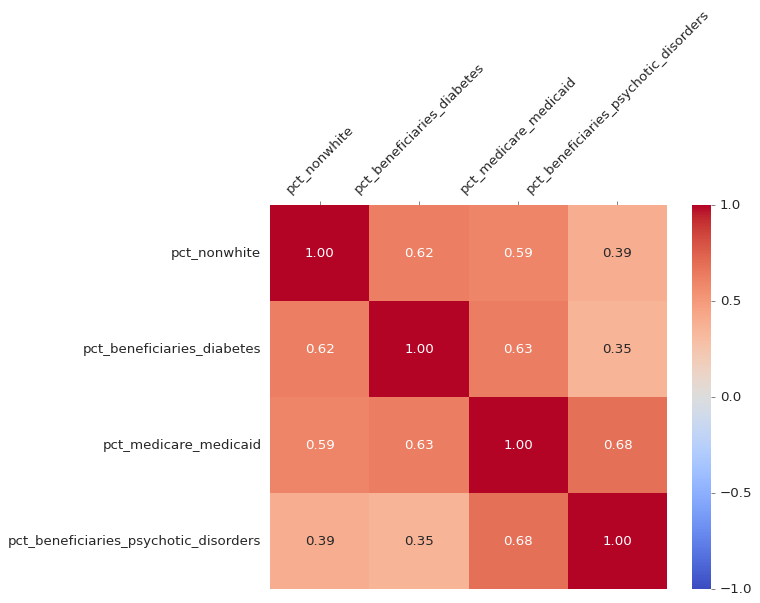

In [ ]:
sb.set_style(style='white', rc=None)
ax = sb.heatmap(df[['pct_nonwhite','pct_beneficiaries_diabetes', 'pct_medicare_medicaid','pct_beneficiaries_psychotic_disorders']].corr(),
                annot=True, fmt='.2f',cmap="coolwarm", vmin=-1, vmax=1);
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
plt.xticks(rotation = 45)


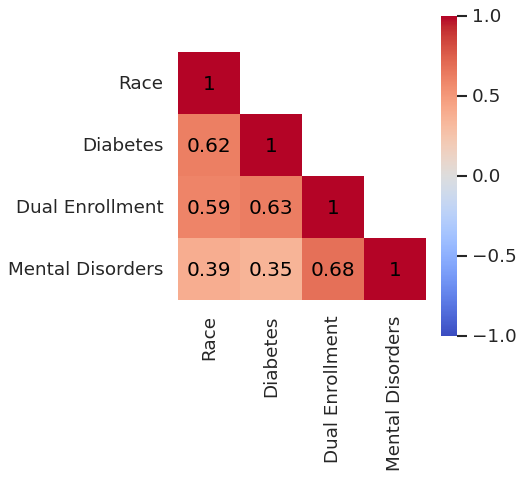

In [ ]:
# create correlation matrix
corr = df[['pct_nonwhite','pct_beneficiaries_diabetes',
           'pct_medicare_medicaid','pct_beneficiaries_psychotic_disorders']].corr()
x_labels = ['Race', 'Diabetes', 'Dual Enrollment', 'Mental Disorders']
y_labels = ["Race", "Diabetes", "Dual Enrollment", "Mental Disorders"]

# initiate figure
fig, ax = plt.subplots(figsize=(5, 5))

sb.set_context("talk")
# mask = np.triu(np.ones_like(corr, dtype=bool))
mask = np.array([[ False,  True,  True,  True],
       [False,  False,  True,  True],
       [False, False,  False,  True],
       [False, False, False,  False]])

# plot
sb.heatmap(
    corr,             #data
    annot=True,       # show correlation values text in each cell
    cmap="coolwarm",  # pallette (diverging for + and -)
    vmin=-1,          # optional minimum value for color bar (defaults to corr min)
    vmax=1,           # optional maximum value for color bar (defaults to corr max)
    ax=ax,             # axis to plot to
    annot_kws={'color':'black'},
    mask = mask,
    square = True,
    xticklabels = x_labels,
    yticklabels = y_labels
)
plt.savefig("corr_plot.png", dpi=300, bbox_inches="tight")

0.0937884447408236


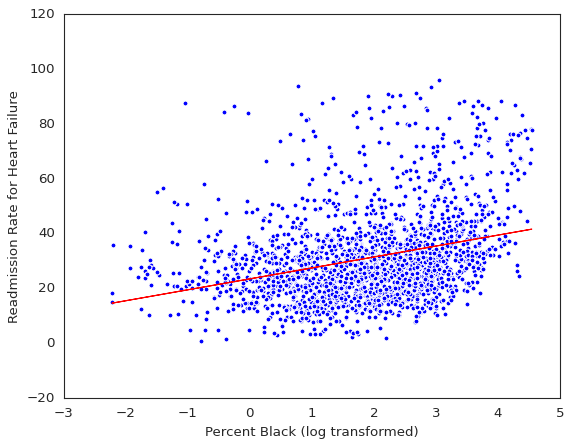

In [ ]:
# Scatter Plot
#X = df['pct_black'].values.reshape(-1, 1)  # values converts it into a numpy array
X = np.log(df['pct_black']).values.reshape(-1, 1)  # values converts it into a numpy array
Y = df['pct_medicare_medicaid'].values.reshape(-1, 1)  # -1 means calculate the dimension of rows, but have 1 column
model = LinearRegression()  # create object for the class
model.fit(X, Y)  # perform linear regression
Y_pred = model.predict(X)  # make predictions
print(r2_score(Y, Y_pred))
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel('Percent Black (log transformed)')
plt.ylabel('Readmission Rate for Heart Failure')
plt.show()

In [ ]:
df = data_hf[svi_cols]

In [ ]:
test = df.corr()
test['hispanic_pct'].sort_values(ascending=False).head(20)

hispanic_pct                              1.000000
no_hs_diploma_pct                         0.955025
limited_english_percentile                0.941795
minority_status_percentile_rank           0.941584
minority_status_sum                       0.941584
minorities_percentile                     0.941584
crowded_housing_percentile                0.941314
limited_english_is_90_percentile          0.941309
no_hs_diploma_is_90_percentile            0.941181
no_hs_diploma_percentile                  0.941160
crowded_housing_is_90_percentile          0.941123
aged_17_under_percentile                  0.940927
minority_status_90_percentile_count       0.940906
minorities_is_90_percentile               0.940906
housing_cost_burdened_percentile          0.940891
aged_17_under_is_90_percentile            0.940822
housing_cost_burdened_is_90_percentile    0.940819
single_parent_hh_percentile               0.940775
single_parent_hh_is_90_percentile         0.940716
below_150_poverty_percentile   

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0.5, 1, 'african_american_pct'),
  Text(1.5, 1, 'hispanic_pct'),
  Text(2.5, 1, 'disabled_pct'),
  Text(3.5, 1, 'socioeconomic_status_sum')])

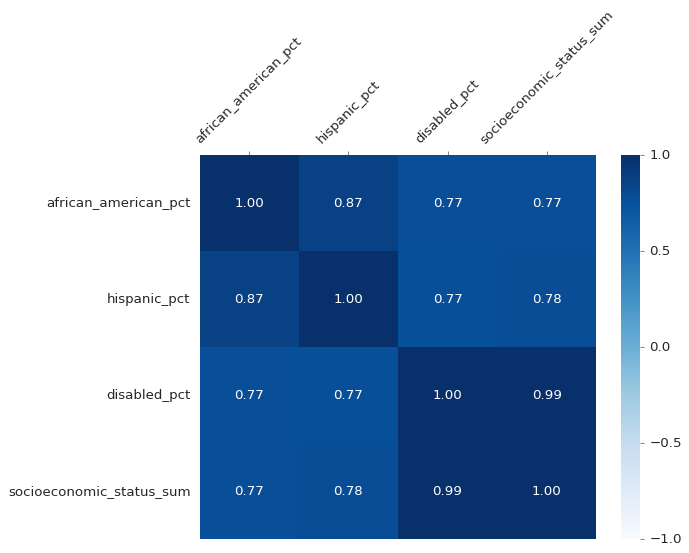

In [ ]:
ax = sb.heatmap(df[['african_american_pct','hispanic_pct','disabled_pct','socioeconomic_status_sum']].corr(), annot=True, fmt='.2f',cmap="Blues", vmin=-1, vmax=1);
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
plt.xticks(rotation = 45)


# Data for Models (without SVI)

In [ ]:
# Model data without SVI
cols = cms_cols + race_cols + ['readmission_rate']
df = data_hf[cols]
df = df.dropna()
XA = df[cms_cols]
XB = df[cms_cols + race_cols]
Y = df['readmission_rate']
scaler = StandardScaler()

scaler.fit(XA)
XA_std = scaler.transform(XA)

scaler.fit(XB)
XB_std = scaler.transform(XB)

# Data for Models (with SVI)

In [ ]:
# Remove erroneous socioecnomic_status_sum
cols = cms_cols + svi_sum_cols + ['readmission_rate']
df = data_hf[cols]
df = df[df['socioeconomic_status_sum']>=0]
df = df[df['hh_characteristics_sum']>=0]
df = df[df['minority_status_sum']>=0]
df = df[df['housing_status_sum']>=0]

In [ ]:
# Model data with SVI
cols = cms_cols + svi_sum_cols + ['readmission_rate']
df = data_hf[cols]
df = df.dropna()
XA = df[cms_cols]
XB = df[cms_cols + svi_sum_cols]
Y = df['readmission_rate']
scaler = StandardScaler()

scaler.fit(XA)
XA_std = scaler.transform(XA)

scaler.fit(XB)
XB_std = scaler.transform(XB)

# Linear Regression

In [ ]:
model = LinearRegression()
num_iterations = 2000
results_list_A = []
results_list_B = []
for i in range(num_iterations):
  x_train, x_test, y_train, y_test = train_test_split(XA_std, Y, test_size=0.2)
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  # r2 = model.score(x_test,y_test)
  results_list_A.append(mean_squared_error(y_test, y_pred, squared=True))

  x_train, x_test, y_train, y_test = train_test_split(XB_std, Y, test_size=0.2)
  model.fit(x_train,y_train)
  results_list_B.append(mean_squared_error(y_test, y_pred, squared=True))

In [ ]:
results_df_A = pd.DataFrame(results_list_A)
results_df_A['model']='A'
results_df_B = pd.DataFrame(results_list_B)
results_df_B['model']='B'
results_df = pd.concat([results_df_A, results_df_B], ignore_index=True)
results_df.rename(columns={0: "MSE"}, inplace=True)

In [ ]:
results_df.groupby('model')['MSE'].mean()

model
A    14.064456
B    23.488741
Name: MSE, dtype: float64

In [ ]:
# fig, ax = plt.subplots(1, 1, figsize=(15, 4))
# sb.boxplot(data=results_df, x="model", y="MSE", dodge=False)

# Random Forest

In [ ]:
# Parameter Sources:
# https://kirenz.github.io/regression/docs/randomforest.html
# https://towardsdatascience.com/random-forest-regression-5f605132d19d

# n_estimators = numbers trees (default is 100)

model = RandomForestRegressor(max_depth=7, max_features = None, min_samples_split=2, n_estimators=500,
                      oob_score=True, random_state=42, warm_start=False)

In [ ]:
# Model A
x_train, x_test, y_train, y_test = train_test_split(XA, Y, test_size=0.2)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mean_squared_error(y_test, y_pred, squared=False)

3.910761878478275

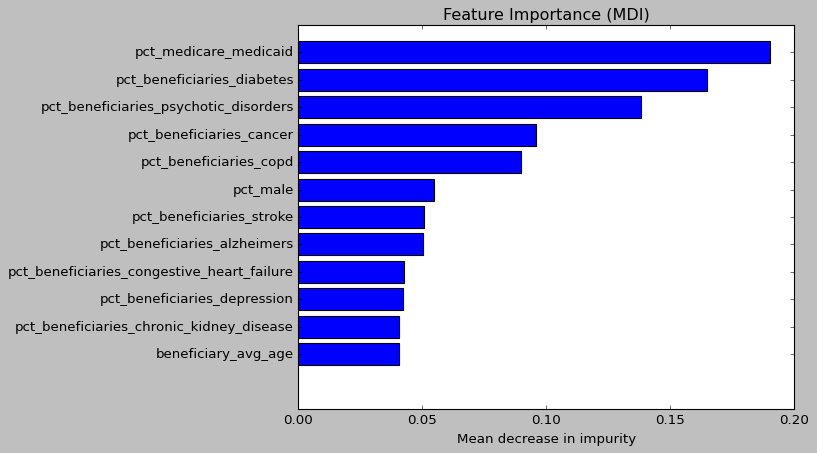

In [ ]:
# Model A feature importance
feature_importance = model.feature_importances_
feature_names = XA.columns
# sort features according to importance
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0])

# plot feature importances
plt.barh(pos, feature_importance[sorted_idx], align="center")

plt.yticks(pos, np.array(feature_names)[sorted_idx])
plt.title("Feature Importance (MDI)")
plt.xlabel("Mean decrease in impurity");

In [ ]:
# Model B
x_train, x_test, y_train, y_test = train_test_split(XB, Y, test_size=0.2)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mean_squared_error(y_test, y_pred, squared=False)

3.662410605726491

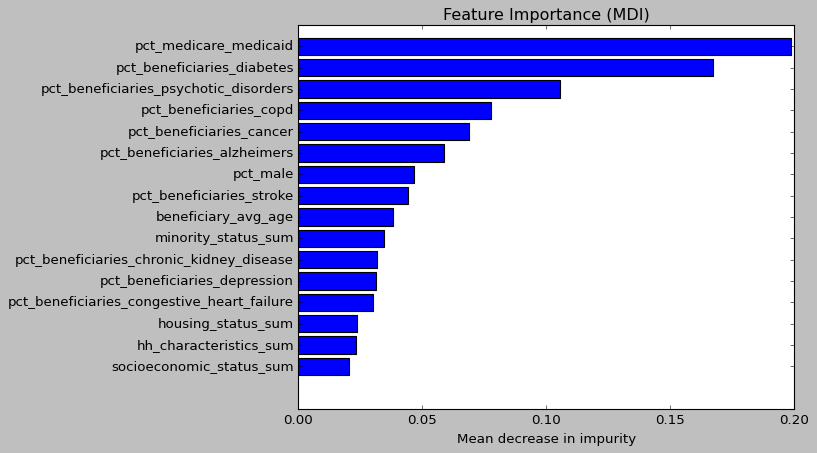

In [ ]:
# Model B feature importance
feature_importance = model.feature_importances_
feature_names = XB.columns
# sort features according to importance
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0])

# plot feature importances
plt.barh(pos, feature_importance[sorted_idx], align="center")

plt.yticks(pos, np.array(feature_names)[sorted_idx])
plt.title("Feature Importance (MDI)")
plt.xlabel("Mean decrease in impurity");

In [ ]:
num_iterations = 50
results_list_A = []
results_list_B = []
feature_importance_A = XA.columns
feature_importance_B = XB.columns
for i in range(num_iterations):
  # Model A
  x_train, x_test, y_train, y_test = train_test_split(XA, Y, test_size=0.2)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  results_list_A.append(mean_squared_error(y_test, y_pred, squared=False))
  feature_importance = model.feature_importances_
  feature_importance_A = np.vstack([feature_importance_A,feature_importance])

  # Model B
  x_train, x_test, y_train, y_test = train_test_split(XB, Y, test_size=0.2)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  results_list_B.append(mean_squared_error(y_test, y_pred, squared=False))
  feature_importance = model.feature_importances_
  feature_importance_B = np.vstack([feature_importance_B,feature_importance])

In [ ]:
results_df_A = pd.DataFrame(results_list_A)
results_df_A['model']='A'
results_df_B = pd.DataFrame(results_list_B)
results_df_B['model']='B'
results_df = pd.concat([results_df_A, results_df_B], ignore_index=True)
results_df.rename(columns={0: "RMSE"}, inplace=True)

<Axes: xlabel='model', ylabel='RMSE'>

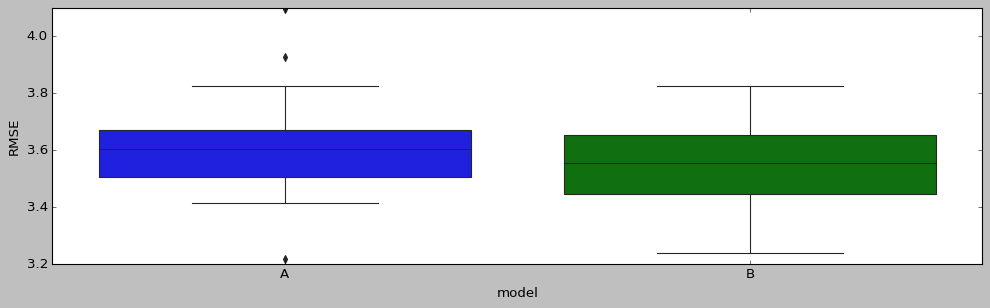

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
sb.boxplot(data=results_df, x="model", y="RMSE", dodge=False)

In [ ]:
results_df.to_csv('/content/drive/MyDrive/Industry/DS4A/ca-sdoh/code/mackenzie/RF_pct_mse.csv', index=False)

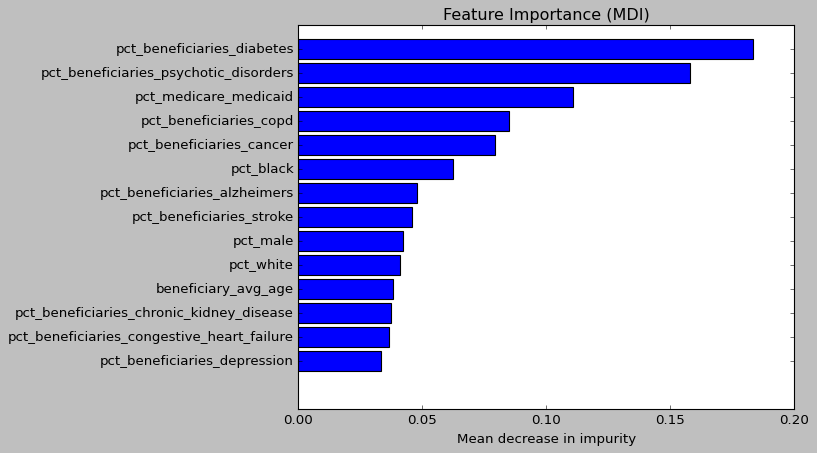

In [ ]:
# Model average feature importance
feature_importance_dfA = pd.DataFrame(feature_importance_A)
feature_importance_dfA  = pd.DataFrame(feature_importance_dfA.values[1:], columns=XA.columns)
feature_importance_dfB = pd.DataFrame(feature_importance_B)
feature_importance_dfB  = pd.DataFrame(feature_importance_dfB.values[1:], columns=XB.columns)

# Change for XA or XB
feature_names = XB.columns
feature_importance = np.array(feature_importance_dfB.mean(axis=0))
# sort features according to importance
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0])

# plot feature importances
plt.barh(pos, feature_importance[sorted_idx], align="center")

plt.yticks(pos, np.array(feature_names)[sorted_idx])
plt.title("Feature Importance (MDI)")
plt.xlabel("Mean decrease in impurity");

In [ ]:
feature_importance_dfA.to_csv('/content/drive/MyDrive/Industry/DS4A/ca-sdoh/code/mackenzie/feature_importance_pctA', index=False)
feature_importance_dfB.to_csv('/content/drive/MyDrive/Industry/DS4A/ca-sdoh/code/mackenzie/feature_importance_pctB', index=False)

# Random Forest for HCC

In [ ]:
# 1 row per hopsital --> just use HF
cols = risk_cols + ['average_hcc_beneficiary_risk_score']
df = data_hf[cols]
df = df.dropna()
XA = df[risk_cols]
Y = df['average_hcc_beneficiary_risk_score']

In [ ]:
# Parameter Sources:
# https://kirenz.github.io/regression/docs/randomforest.html
# https://towardsdatascience.com/random-forest-regression-5f605132d19d

# n_estimators = numbers trees (default is 100)

model = RandomForestRegressor(max_depth=7, max_features = None,
          min_samples_split=2, n_estimators=500, oob_score=True,
          random_state=42, warm_start=False)

In [ ]:
num_iterations = 10
results_list_A = []
feature_importance_A = XA.columns
for i in range(num_iterations):
  x_train, x_test, y_train, y_test = train_test_split(XA, Y, test_size=0.2)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  results_list_A.append(mean_squared_error(y_test, y_pred, squared=False))
  feature_importance = model.feature_importances_
  feature_importance_A = np.vstack([feature_importance_A,feature_importance])

<Axes: xlabel='model', ylabel='RMSE'>

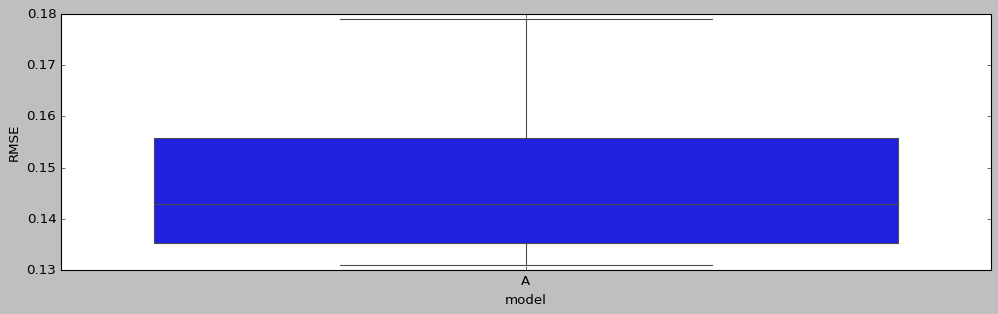

In [ ]:
results_df_A = pd.DataFrame(results_list_A)
results_df_A['model']='A'
results_df = results_df_A
results_df.rename(columns={0: "RMSE"}, inplace=True)
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
sb.boxplot(data=results_df, x="model", y="RMSE", dodge=False)

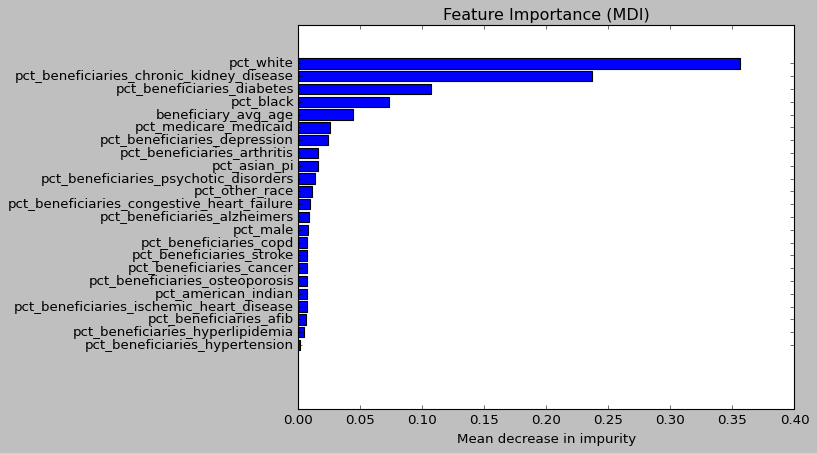

In [ ]:
# Model average feature importance
feature_importance_dfA = pd.DataFrame(feature_importance_A)
feature_importance_dfA  = pd.DataFrame(feature_importance_dfA.values[1:], columns=XA.columns)

feature_names = XA.columns
feature_importance = np.array(feature_importance_dfA.mean(axis=0))
# sort features according to importance
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0])

# plot feature importances
plt.barh(pos, feature_importance[sorted_idx], align="center")

plt.yticks(pos, np.array(feature_names)[sorted_idx])
plt.title("Feature Importance (MDI)")
plt.xlabel("Mean decrease in impurity");